In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("NewCar.csv")
df.head()

,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,engine-location,wheel-base,length,width,height,curbweight,num-of-cylinders,engine-size,fuel-system,compression-ratio,horsepower,peak-rpm,citympg,highway-mpg,price
0,121.803681,gas,std,two,convertible,front,88.6,168.8,64.1,48.8,2548,four,130,mpfi,9.0,111,5000,21,27.0,13495.0
1,121.803681,gas,std,two,convertible,front,88.6,168.8,64.1,48.8,2548,four,130,mpfi,9.0,111,5000,21,27.0,16500.0
2,121.803681,gas,std,two,hatchback,front,94.5,171.2,65.5,52.4,2823,six,152,mpfi,9.0,154,5000,19,26.0,16500.0
3,164.000000,gas,std,four,sedan,front,99.8,176.6,66.2,54.3,2337,four,109,mpfi,10.0,102,5500,24,30.0,13950.0
4,164.000000,gas,std,four,sedan,front,99.4,176.6,66.4,54.3,2824,five,136,mpfi,8.0,115,5500,18,22.0,17450.0


In [3]:
x=df[['curbweight']]
y=df['price']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression
l=LinearRegression()
l.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
print(l.intercept_)

-12724.491442091756


In [7]:
l.coef_

array([9.87189362])

In [8]:
prediction=l.predict(X_test)

In [9]:
prediction

array([19161.72495374, 17414.39978282, 18174.53559164, 10671.89643968,
       24295.10963666, 14265.26571773, 12053.96154662, 17049.13971885,
       17009.65214436,  9595.86003499, 24196.39070045,  9033.16209859,
       12310.63078077,  9526.75677964, 10819.974844  , 12735.12220647,
        1964.88626596, 10257.2769076 , 10770.61537589, 11511.00739747,
       16654.26397401, 10217.78933311,  7384.55586389,  5232.48305451,
       14916.81069671, 20642.50899689, 11106.25975901, 10997.66892917,
        9635.34760948, 14482.44737739, 21975.21463573, 24492.54750908,
       20504.3024862 , 21777.77676331,  7058.78337439, 19813.26993273,
        8450.72037496,  8203.92303443, 12350.11835525, 11017.41271642,
       16160.66929296, 16417.3385271 ,  7295.7088213 , 10020.35146069,
        6693.52331042,  7098.27094888, 19704.6791029 ,  4186.06233068,
        5775.43720366, 10819.974844  ,  7818.91918321, 12458.70918508,
        6407.23839541, 12024.34586576, 12735.12220647,  6693.52331042,
      

In [10]:
y_test.head()

15     27500.000000
9      12663.455959
115    18150.000000
78      9959.000000
66     27500.000000
Name: price, dtype: float64

Text(0.5,0,'Profit in $')

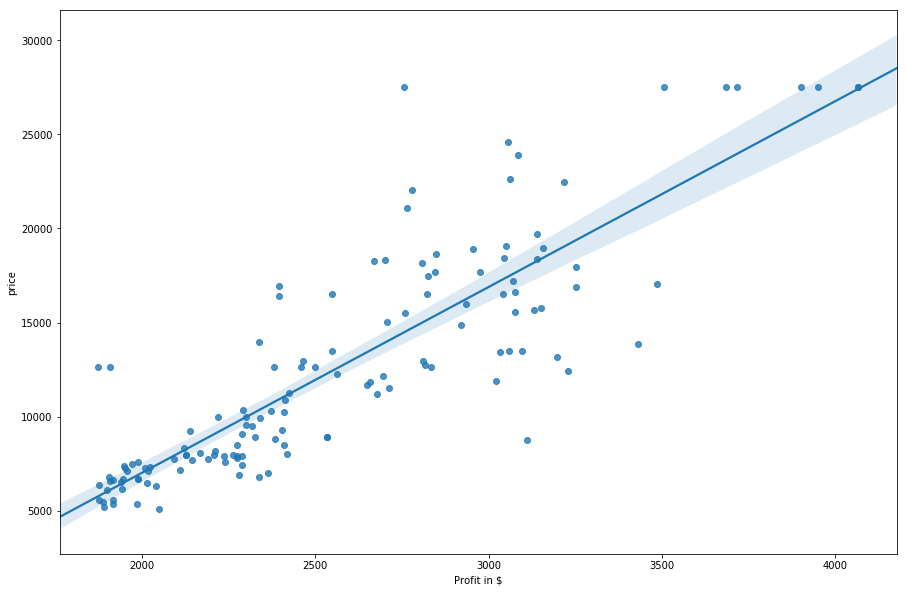

In [11]:
plt.figure(figsize = (15,10))
sns.regplot(X_train,y_train)
plt.xlabel("Profit in $")

Text(0.5,60,'curbweight')

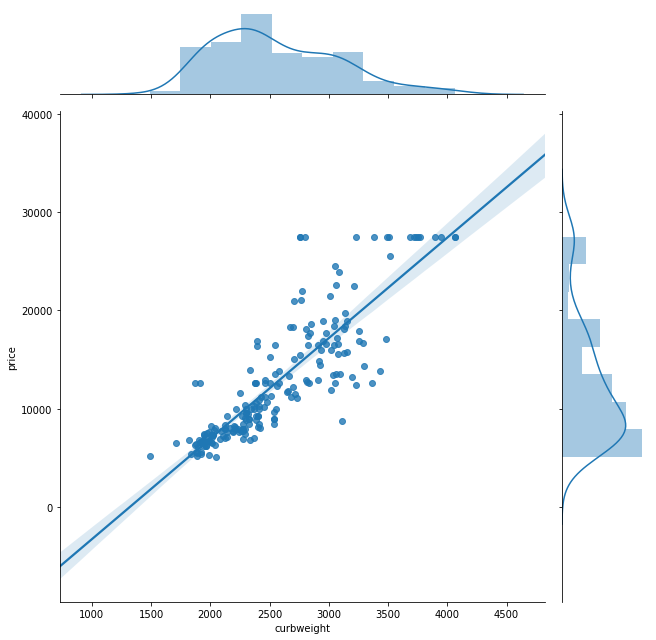

In [12]:
#plt.figure(figsize = (15,10))
sns.jointplot(y=df['price'],x=df['curbweight'],kind='reg',height=9)
plt.xlabel("curbweight")

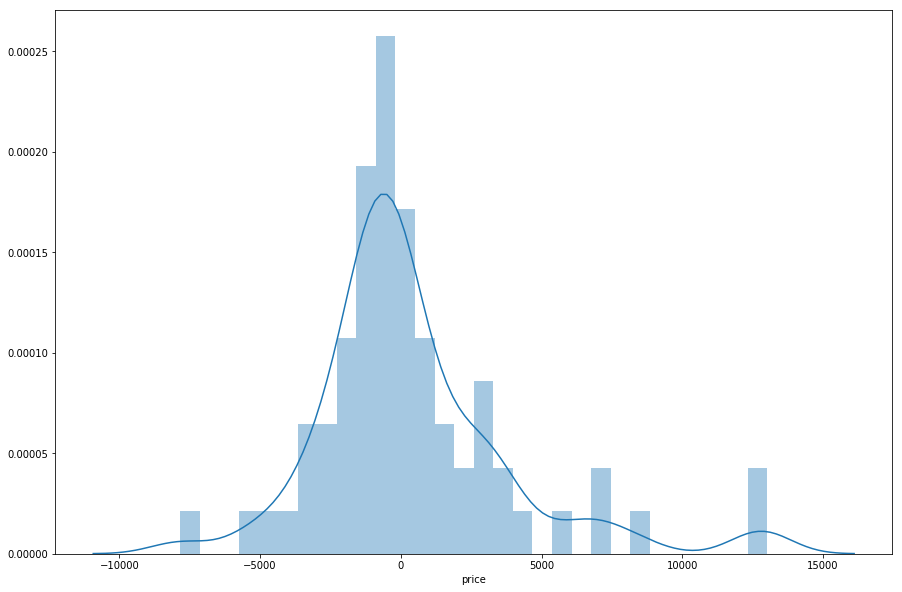

In [13]:
plt.figure(figsize = (15,10))
sns.distplot(y_test-prediction,bins=30)

In [14]:
from sklearn import metrics

In [15]:
metrics.mean_absolute_error(y_test,prediction)

2346.7141290149852

In [16]:
metrics.mean_squared_error(y_test,prediction)

12569260.00237383

In [17]:
np.sqrt(metrics.mean_squared_error(y_test,prediction))

3545.315219042424

In [18]:
accuracy = l.score(X_test,y_test)

In [19]:
print(accuracy*100,'%')

71.94769933247039 %


In [20]:
metrics.r2_score(y_train,l.predict(X_train))

0.7413233784423396

In [21]:
metrics.r2_score(y_test,prediction)

0.719476993324704